<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least Squares (Linear) Regression

- From [this Least Squares example](https://github.com/SergioRAgostinho/bootstrap-ml/blob/master/least_squares.ipynb) Notebook.
    - Author:  [Sérgio Agostinho](https://www.linkedin.com/in/sergioagostinho)
    - [Sérgio's GitHub repository](https://github.com/SergioRAgostinho/bootstrap-ml)

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.

This was made from the [Bootstrap-ML](http://sergioagostinho.com/bootstrap-ml) workshop which took place on the 22nd of March 2018 at the Mathematics Department of [Instituto Superior Técnico](https://tecnico.ulisboa.pt/en/).

This workshop, given by Sérgio Agostinh, was a two-hour introductory session in Machine Learning (ML).

## Introduction

We're going to tackle one of the most simple and yet powerful tools of Machine Learning, the Least Squares estimator. Given a function in the shape of 

$$
\hat y = w^T\Phi\left(x\right) + b
$$

where $\hat y, b \in $ [$\mathbb{R}$](https://en.wikipedia.org/wiki/Real_number) and [$\Phi$](https://en.wikipedia.org/wiki/Phi) is a mapping from our input space to a given feature space such that $\Phi: \mathbb{R}^m \to \mathbb{R}^n$, we want to estimate the optimal $w$ which minimizes $e$.

$$
e = \sum^{N}_{i = 1} \left(y - \hat y\right)^2
$$

> $w$ is usually referred to as a [weight matrix](https://datascience.stackexchange.com/questions/23462/dimension-of-weight-matrix-in-neural-network), and you will encounter it in nearly every aspect of machine learning.

> $e$ is the $error$ or $cost$ which results from the [loss function](https://en.wikipedia.org/wiki/Loss_function) (also referred to, almost interchangably, as an error function, cost function, etc.) All machine learning requires some such a function to evaluate the merits of a given model.

## Problem: fit a straight line through a number of points

This is the most basic and common use case, so we need to see it in action. Let's generate a number of random points between $\left[0, 1\right]$ according to the following model

$$
y = 2x + 1 + e
$$

where $e \sim \mathcal{N} \left(0, 0.2^2\right)$. In this case $w \in \mathbb{R}$ and is equal to $2$, $x \in \mathcal{U} \left(0, 1\right)$ and $b=1$


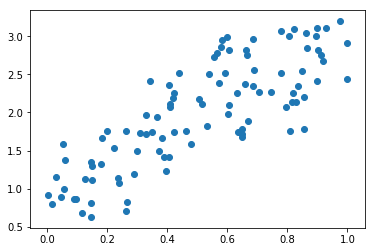

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math


n = 100
x = np.random.uniform(size=n)
e = np.random.normal(scale=0.4, size=n)
y = 2*x + 1 + e

#
plt.scatter(x=x, y=y)
plt.show()


In [2]:
x

array([0.64932055, 0.02942217, 0.84918868, 0.65008906, 0.39065505,
       0.83615415, 0.20053099, 0.55518311, 0.09563106, 0.38451668,
       0.77981614, 0.17909889, 0.59909031, 0.26233891, 0.57812102,
       0.4215293 , 0.14647903, 0.60627628, 0.86055432, 0.43874021,
       0.46151048, 0.6363766 , 0.63155784, 0.14969594, 0.5730302 ,
       0.18251966, 0.1162099 , 0.34266195, 0.56714942, 0.74719958,
       0.40544424, 0.85662418, 0.91087273, 0.14596248, 0.05890494,
       0.23534269, 0.3300849 , 0.53882453, 0.29138467, 0.80912183,
       0.82978949, 0.68602399, 0.15155997, 0.895248  , 0.36717031,
       0.39691851, 0.86419085, 0.30847143, 0.04871027, 0.81868712,
       0.298392  , 0.41126286, 0.9984482 , 0.81407791, 0.89756117,
       0.51560119, 0.37166732, 0.24147044, 0.90217288, 0.48056301,
       0.41900459, 0.50644043, 0.66947829, 0.97521157, 0.01709265,
       0.65805518, 0.00437657, 0.64797626, 0.08940724, 0.70660516,
       0.05739903, 0.42371059, 0.79406221, 0.26753589, 0.85499

In [3]:
y

array([1.71848562, 1.15799099, 2.54530042, 1.78181105, 1.41188779,
       2.34312941, 1.75128753, 2.72995677, 0.86312082, 1.67114798,
       2.51834739, 1.32837117, 2.99242552, 1.76204304, 2.86395483,
       1.74283917, 1.34591838, 2.09641479, 3.04237965, 2.52413672,
       1.75765429, 1.74472498, 2.26210723, 1.11888326, 2.39193581,
       1.66253576, 0.6770261 , 2.41651189, 2.77556974, 2.2660998 ,
       2.36070569, 2.19873125, 2.75271777, 0.8053869 , 1.37441006,
       1.13727045, 1.72306177, 2.50390673, 1.18795825, 1.75028208,
       2.14025392, 2.35364134, 1.29703637, 3.00444097, 1.94468173,
       1.22960147, 2.84415506, 1.73339551, 0.8947892 , 2.26078161,
       1.49078043, 2.11437894, 2.90681766, 2.14380786, 3.10926051,
       2.11053847, 1.48871587, 1.07401183, 2.82645436, 1.58792813,
       2.19391311, 2.17939581, 1.89238815, 3.1980936 , 0.79503009,
       2.36852619, 0.92099279, 1.67431693, 0.85711212, 2.2700353 ,
       0.99306436, 2.26133728, 2.07419286, 0.81931207, 1.78460

### How to find the best $w$ and $b$?

Let's derive this one time so that you understand the most basic concepts of all these algorithms. We are interested in finding the weight vector $w$ which minimizes the sum of the square error

\begin{equation}
\underset{w}{\operatorname{argmin}} e = \sum^{N}_{i = 1} \left(y_i - w^T \Phi(x_i) - b \right)^2 
\end{equation}

We can augment $w$ such that $w_0 = b$ and $w \in \mathbb{R}^{n+1}$ and rewrite the expression above as

\begin{equation}
\underset{w}{\operatorname{argmin}} e = \sum^{N}_{i = 1} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2 
\end{equation}


Since the equation is linear, it has a closed-form solution. Let's start by finding the $w$ which gives us a null gradient. We're also going to make use of an important property of matrix derivatives, in this case applied to vectors

\begin{equation}
\frac{d x^Ta}{dx} =  a
\end{equation}

for $a, x \in \mathbb{R}^n$.

\begin{eqnarray}
\frac{d}{dw} \sum^{N}_{i = 1} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2  & = & 0 \\
\sum^{N}_{i = 1} \frac{d}{dw} \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right)^2 & = & 0 \\
\sum^{N}_{i = 1} -2 \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left(y_i - w^T \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \right) & = & 0 \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left(\left[\begin{matrix}\Phi(x_i)^T & 1 \end{matrix} \right] w - y_i\right) & = & 0 \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] \left[\begin{matrix}\Phi(x_i)^T & 1 \end{matrix} \right] w & = & \sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] y_i \\
\sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i)\Phi(x_i)^T & \Phi(x_i) \\ \Phi(x_i)^T & 1 \end{matrix} \right] w & = & \sum^{N}_{i = 1} \left[\begin{matrix}\Phi(x_i) \\ 1 \end{matrix} \right] y_i \\
 \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i) \\ \sum^{N}_{i = 1} \Phi(x_i)^T & N \end{matrix} \right] w & = & \left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]
\end{eqnarray}

resulting of course in

\begin{equation}
 w = \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i) \\ \sum^{N}_{i = 1} \Phi(x_i)^T & N \end{matrix} \right]^{-1}\left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]\\
\end{equation}

Let's apply this proof to our case. First we need to figure what is what. We know the data was generated under the following model

\begin{equation}
y = 2x + 1
\end{equation}

plus some added noise. In this case the $\Phi(x) = x$, $w = 2$ and $b = 1$.



## Numpy [linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

We have a handy function available that solves exactly this kind of system, but we had to do a lot of math first.

In [4]:
X = np.array([[np.dot(x, x), np.sum(x)],[np.sum(x), n]])
Y = np.array([np.dot(x,y), np.sum(y)])
theta = np.linalg.solve(X,Y)
print(theta)

[2.01895708 0.96753642]


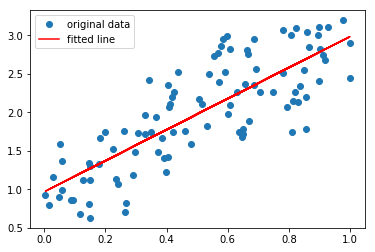

In [5]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, theta[0]*x + theta[1], 'r', label='fitted line')
plt.legend()
plt.show()

## Scikit Learn [linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

Scikit already provides linear regression capabilities among others. So everything we went through could have been replaced by:

In [6]:
import sklearn
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [2.01895708]
Intercept: 
 0.9675364156965405


Note that we needed to use [numpy reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) here so that our inputs to the fit function are 2D matrices

See [this example for more on using sklearn linear models](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [7]:
print(f"x's shape was {y.shape}")
print(f"x is reshaped to {x.reshape(-1,1).shape}")
print(f"y's shape is {y.shape}")
print("--So for each entry in Y we have an input vector in X containing exactly one item.")

x's shape was (100,)
x is reshaped to (100, 1)
y's shape is (100,)
--So for each entry in Y we have an input vector in X containing exactly one item.


## Bonus math

If you haven't had enough, feel free to note this nice equivalence in linear algebra using normal equations.

### Normal Equations

\begin{equation}
 w = \left[\begin{matrix}\sum^{N}_{i = 1} \Phi(x_i)\Phi(x_i)^T & \sum^{N}_{i = 1} \Phi(x_i)^T \\ \sum^{N}_{i = 1} \Phi(x_i) & N \end{matrix} \right]^{-1}\left[\begin{matrix} \sum^{N}_{i = 1}\Phi(x_i) y_i \\ \sum^{N}_{i = 1}y_i \end{matrix} \right]\\
\end{equation}

Can be written in another way commonly known as the **normal equations**. Just like before, consider you have $N$ samples and you stack your features and your target like this

\begin{equation}
X =  \left[\begin{matrix}\Phi(x_1)^T & \dots  & 1 \\
                         \vdots    & \ddots & \vdots \\
                         \Phi(x_N)^T & \dots  & 1 \end{matrix}\right]
\end{equation}

\begin{equation}
\textbf{y} =  \left[\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right]
\end{equation}


The best $w$ is given by

\begin{equation}
\hat{w} = (X^TX)^{-1} X^T  \textbf{y}
\end{equation}

Let's test it.

In [8]:
X = np.matrix([x, np.ones(len(x))]).T
Y = np.matrix(y).T
print("X shape:\n", X.shape)
print("Y shape:\n", Y.shape)

w = np.linalg.solve(X.T * X, X.T * Y)
print("w:\n", w)

X shape:
 (100, 2)
Y shape:
 (100, 1)
w:
 [[2.01895708]
 [0.96753642]]


## Bonus! LinearRegression Example

- [This example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) is pulled directly from the scikit-learn examples, and lightly edited. This works with only a single feature, so it's pretty useless.

In [9]:
# Get the dataset and segment it into training and test sets.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print(f"- Available features are : {diabetes.feature_names}")

- Available features are : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [10]:
# Use only one feature,
feature = 2
print(f'- Using only feature #{feature} which is "{diabetes.feature_names[feature]}"')
diabetes_X = diabetes.data[:, np.newaxis, feature]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

- Using only feature #2 which is "bmi"


After you've tried this, let's see if some other features would be helpful.

In [0]:
# Build and train the model.

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


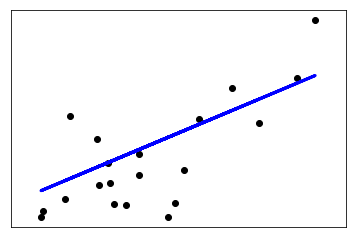

In [12]:
# Display the results.

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Explore the Diabetes data set

Take a closer look at the content of the dataset using Pandas.

In [13]:
ds = diabetes
print(ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [14]:
ds

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [15]:
import pandas as pd
X = pd.DataFrame(ds['data'], columns=ds['feature_names'])
Y = pd.DataFrame(ds['target'], columns=['target'])

df = pd.DataFrame(np.c_[ds['data'], ds['target']],
                  columns= np.append(ds['feature_names'], ['target']))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


### End of notebook.